**Описание проекта**

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.
Инструкция по выполнению проекта

Загрузите и подготовьте данные. Поясните порядок действий.
Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.

Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.

Проведите финальное тестирование.


Описание данных

  * RowNumber — индекс строки в данных
  * CustomerId — уникальный идентификатор клиента
  * Surname — фамилия
  * CreditScore — кредитный рейтинг
  * Geography — страна проживания
  * Gender — пол
  * Age — возраст
  * Tenure — сколько лет человек является клиентом банка
  * Balance — баланс на счёте
  * NumOfProducts — количество продуктов банка, используемых клиентом
  * HasCrCard — наличие кредитной карты
  * IsActiveMember — активность клиента
  * EstimatedSalary — предполагаемая зарплата

Целевой признак: Exited — факт ухода клиента

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Итог:" data-toc-modified-id="Итог:-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Итог:</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

## Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/datasets/Churn.csv', decimal = ',')

In [ ]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.0,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.8,3,1,0,113931.57,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RowNumber        10000 non-null  int64 
 1   CustomerId       10000 non-null  int64 
 2   Surname          10000 non-null  object
 3   CreditScore      10000 non-null  int64 
 4   Geography        10000 non-null  object
 5   Gender           10000 non-null  object
 6   Age              10000 non-null  int64 
 7   Tenure           9091 non-null   object
 8   Balance          10000 non-null  object
 9   NumOfProducts    10000 non-null  int64 
 10  HasCrCard        10000 non-null  int64 
 11  IsActiveMember   10000 non-null  int64 
 12  EstimatedSalary  10000 non-null  object
 13  Exited           10000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.1+ MB


In [ ]:
data_ohe = pd.get_dummies(df[['RowNumber', 'Geography', 'Gender']], drop_first=True)
data_first = pd.merge(data_ohe, df, how='left', on='RowNumber')
data = data_first.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'] , axis=1)
data = data.dropna()

In [ ]:
target = data['Exited']
features = data.drop(['Exited'] , axis=1)

features_80, features_test, target_80, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_80, target_80, test_size=0.25, random_state=12345)

In [ ]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(5454, 11)
(1818, 11)
(1819, 11)


In [ ]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

/tmp/ipykernel_24/236808451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_24/236808451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [ ]:
features_train.head(3)

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3706,0,1,0,-0.203819,0.471273,0.352316,0.786022,0.782369,0,0,-0.357205
6805,0,0,0,-0.357513,-0.384930,-1.373506,-1.230577,0.782369,1,1,-1.671048
4449,0,0,1,0.175290,-0.289797,-0.683177,-1.230577,0.782369,1,0,-1.119181


Колонки 'RowNumber', 'CustomerId', 'Surname' убрала из выборки, так как, они не содержат важную информацию для моделей. Категориальные 'Geography', 'Gender' перобразовала в численные признаки техникой прямого кодирования One-Hot Encoding.

Не знаю как делить выборку сразу на 3 части, поэтому взяла 20% от отбщей части под тестовую выборку, а потом еще 25% от отстатка на валидационную. Так получила соотношение частей 3:1:1 относительно первоначальных данных.


## Исследование задачи

In [ ]:
print('    Баланс классов выборки')
print('ушедших клиентов:         ', df['Exited'].sum())
print('всего клиентов:           ', df['Exited'].count())
print('процент ушедших клиентов:', round(df['Exited'].sum()*100/df['Exited'].count(),2), '%')

    Баланс классов выборки
ушедших клиентов:          2037
всего клиентов:            10000
процент ушедших клиентов: 20.37 %


(array([7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2037.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

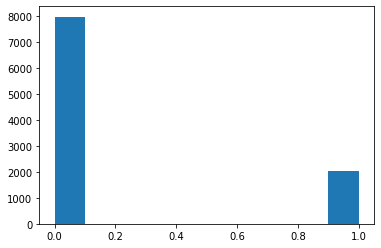

In [ ]:
plt.hist(df['Exited'])

In [ ]:
print('    Баланс классов обучающей выборки')
print('ушедших клиентов:         ', target_train.sum())
print('всего клиентов:           ', target_train.count())
print('процент ушедших клиентов:', round(target_train.sum()*100/target_train.count(),2), '%')

    Баланс классов обучающей выборки
ушедших клиентов:          1119
всего клиентов:            5454
процент ушедших клиентов: 20.52 %


В обучающей и первоночальной выборках примерно одинковый объем ушедших клиентов (20%) - выборка поделилась равномерно

In [ ]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
prediction = model.predict(features_valid)

In [ ]:
print('матрица ошибок')
print(confusion_matrix(target_valid, prediction))

матрица ошибок
[[1405   47]
 [ 293   73]]


In [ ]:
print('точность', precision_score(target_valid, prediction))
print('полнота ', recall_score(target_valid, prediction))
print('f1-мера ', f1_score(target_valid, prediction))

точность 0.6083333333333333
полнота  0.1994535519125683
f1-мера  0.3004115226337448


показатели довольнонизкие - нужно тщательно подбирать гиперпараметры и тип модели

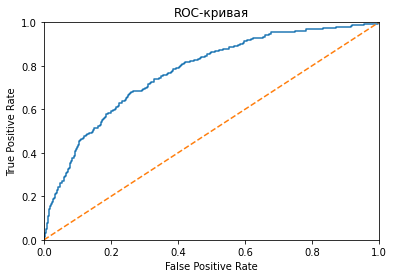

AUC-ROC  0.7725184031070766


In [ ]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC ', auc_roc)

Баланс классов целевого признака далек от идеального, но есть из чего собрать подходящую обучающую выборку. 

## Борьба с дисбалансом

In [ ]:
def upsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros, features_ones, features_ones, features_ones, features_ones])
    target_upsampled = pd.concat([target_zeros, target_ones, target_ones, target_ones, target_ones])
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

С дисбалансом выборки решила бороться методом размножения меньшинства, что бы не терять данные.

In [ ]:
features_upsampled, target_upsampled = upsample(features_train, target_train)

print('    Баланс классов выборки')
print('ушедших клиентов:         ', target_upsampled.sum())
print('всего клиентов:           ', target_upsampled.count())

    Баланс классов выборки
ушедших клиентов:          4476
всего клиентов:            8811


In [ ]:
Logistic_model = LogisticRegression()
Logistic_model.fit(features_train, target_train)
Logistic_prediction = [int(p>=0.5) for p in Logistic_model.predict(features_valid)] 
print('метрика f1', f1_score(target_valid, Logistic_prediction))

метрика f1 0.3004115226337448


In [ ]:
max_depth = 0
max_f1 = 0
for depth in range(1, 50, 1):    # 13    
    Forest_model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=999)
    Forest_model.fit(features_train, target_train)
    if max_f1 < f1_score(target_valid, Forest_model.predict(features_valid)):
        max_f1 = f1_score(target_valid, Forest_model.predict(features_valid))
        max_depth = depth
    
print('max_depth =', max_depth) 
print('метрика f1', max_f1)

max_depth = 13
метрика f1 0.5815126050420167


In [ ]:
max_trees = 0
max_f1 = 0
for trees in range(1, 100, 1):    # 18
    Forest_model_15 = RandomForestClassifier(n_estimators=trees, max_depth=13, random_state=999)
    Forest_model_15.fit(features_train, target_train)
    if max_f1 < f1_score(target_valid, Forest_model_15.predict(features_valid)):
        max_f1 = f1_score(target_valid, Forest_model_15.predict(features_valid))
        max_trees = trees
print('n_estimators =', max_trees) 
print('метрика f1', max_f1)    

n_estimators = 18
метрика f1 0.5923460898502496


Логистическая регрессия имеет довольно низкий коэффициент детерминации, в отличии от модели случайного леса. К тому же у второй модели можно подбирать гиперпараметры. Так я нашла наилучший вариент - 18 деревьев с максимальной глубиной 13. f1 метрики получилась чуть выше пороговой в 0,59.

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

(array([1084.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1119.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

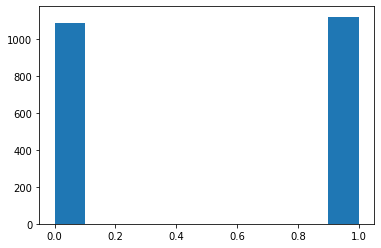

In [ ]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
plt.hist(target_downsampled)

In [ ]:
downsampled_model = RandomForestClassifier(n_estimators=18, max_depth=13, random_state=999)
downsampled_model.fit(features_downsampled, target_downsampled)

RandomForestClassifier(max_depth=13, n_estimators=18, random_state=999)

In [ ]:
RandomForest_prediction_valid = downsampled_model.predict(features_valid)
print('f1-мера ', f1_score(target_valid, RandomForest_prediction_valid))
RandomForest_prediction_test = downsampled_model.predict(features_test)
print('f1-мера ', f1_score(target_test, RandomForest_prediction_test))

f1-мера  0.5492662473794548
f1-мера  0.3412929528246942


<div class="alert alert-info"> <b>Комментарий студента:</b> 
    На выбранных ранее гиперпараметрах обучилась не самая выдающаяся модель.
</div>

In [ ]:
max_depth_downsampled = 0
max_f1_downsampled = 0
for depth in range(1, 50, 1):    # 21
    Forest_model_downsampled = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=999, class_weight='balanced')
    Forest_model_downsampled.fit(features_downsampled, target_downsampled)
    if max_f1_downsampled < f1_score(target_valid, Forest_model_downsampled.predict(features_valid)):
        max_f1_downsampled = f1_score(target_valid, Forest_model_downsampled.predict(features_valid))
        max_depth_downsampled = depth
    
print('max_depth =', max_depth_downsampled) 
print('метрика f1', max_f1_downsampled)

max_depth = 21
метрика f1 0.7733050847457626


In [ ]:
max_trees_downsampled = 0
max_f1_downsampled = 0
for trees in range(1, 100, 1):    # 20
    Forest_model_15_downsampled = RandomForestClassifier(n_estimators=trees, max_depth=21, random_state=999, class_weight='balanced')
    Forest_model_15_downsampled.fit(features_downsampled, target_downsampled)
    if max_f1_downsampled < f1_score(target_valid, Forest_model_15_downsampled.predict(features_valid)):
        max_f1_downsampled = f1_score(target_valid, Forest_model_15_downsampled.predict(features_valid))
        max_trees_downsampled = trees
print('n_estimators =', max_trees_downsampled) 
print('метрика f1', max_f1_downsampled)  

n_estimators = 20
метрика f1 0.7733050847457626


In [ ]:
RandomForest_model_downsampled = RandomForestClassifier(n_estimators=92, max_depth=9, random_state=999, class_weight='balanced')
RandomForest_model_downsampled.fit(features_train, target_train)
RandomForest_prediction_test = RandomForest_model_downsampled.predict(features_test)
print('f1-мера ', f1_score(target_test, RandomForest_prediction_test))

f1-мера  0.23880597014925373


<div class="alert alert-info"> <b>Комментарий студента:</b> 
    При подборе гиперпараметров, модель, обученная на уменьшенной выборке отработала чгораздо лучше, однако на тестовых данных результат достаточно низкий
</div>

In [ ]:
max_depth_balanced = 0
max_f1_balanced = 0
for depth in range(1, 50, 1):    # 8   
    Forest_model_balanced = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=999, class_weight='balanced')
    Forest_model_balanced.fit(features_train, target_train)
    if max_f1_balanced < f1_score(target_valid, Forest_model_balanced.predict(features_valid)):
        max_f1_balanced = f1_score(target_valid, Forest_model_balanced.predict(features_valid))
        max_depth_balanced = depth
    
print('max_depth =', max_depth_balanced) 
print('метрика f1', max_f1_balanced)

max_depth = 8
метрика f1 0.6037267080745341


In [ ]:
max_trees_balanced = 0
max_f1_balanced = 0
for trees in range(1, 100, 1):    # 18
    Forest_model_15 = RandomForestClassifier(n_estimators=trees, max_depth=8, random_state=999, class_weight='balanced')
    Forest_model_15.fit(features_train, target_train)
    if max_f1_balanced < f1_score(target_valid, Forest_model_15.predict(features_valid)):
        max_f1_balanced = f1_score(target_valid, Forest_model_15.predict(features_valid))
        max_trees_balanced = trees
print('n_estimators =', max_trees_balanced) 
print('метрика f1', max_f1_balanced)    

n_estimators = 18
метрика f1 0.6074074074074074


In [ ]:
RandomForest_model_balanced = RandomForestClassifier(n_estimators=18, max_depth=13, random_state=999, class_weight='balanced')
RandomForest_model_balanced.fit(features_train, target_train)

RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=18,
                       random_state=999)

In [ ]:
RandomForest_prediction_test = RandomForest_model_balanced.predict(features_test)
print('f1-мера ', f1_score(target_test, RandomForest_prediction_test))

f1-мера  0.1641337386018237



    Результат на валидационной выборке просто шикарный, но вот на тестовой слабоват. Создается ощущение, что модель переобучена. Хотя для меня остается бальшой загадкой, почему на двух независимых выборках (тестовой и валидационной) модели случайного леса с разными гиперпарамтрами паказывают такой схожий результат


## Тестирование модели

In [ ]:
RandomForest_model = RandomForestClassifier(n_estimators=18, max_depth=13, random_state=999)
RandomForest_model.fit(features_train, target_train)

In [ ]:
RandomForest_prediction = RandomForest_model.predict(features_test)
print('f1-мера ', f1_score(target_test, RandomForest_prediction))

f1-мера  0.26610978520286394


In [ ]:
print('матрица ошибок')
print(confusion_matrix(target_test, RandomForest_prediction))

матрица ошибок
[[ 366 1084]
 [ 146  223]]


In [ ]:
print('точность', precision_score(target_test, RandomForest_prediction))
print('полнота ', recall_score(target_test, RandomForest_prediction))
print('f1-мера ', f1_score(target_test, RandomForest_prediction))

точность 0.17061973986228002
полнота  0.6043360433604336
f1-мера  0.26610978520286394


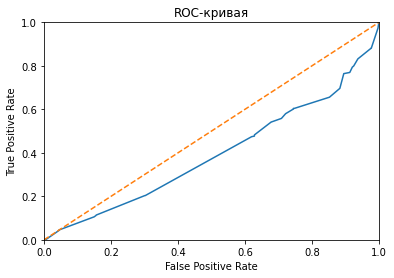

AUC-ROC  0.39364638818801984


In [ ]:
probabilities_test = RandomForest_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC ', auc_roc)

Не смотря на неплохие результаты на валидационной выборке, на тестовой все пошло не по плану и коэффициент детерминации уменьшился более чем в 2 раза. О проблемах в модели говорят и остальные метрики:

    * матрица ошибок перекошена в сторону FP
    * точность уменьшилась в 3 раза
    * кривая ошибок показала результат хуже, чем модель случайных ответов
    * AUC-ROC уменьшился в 2 раза
    
из положительных изменений:

    * полнота увеличилась в 3 раза 
    
#### Итог:
Я попробовала применить, для решения задачи, две модели: логистической регрессии и случайного леса. Обе показали себя не достаточно эффективными, однако каждая имеет свои недостатки. Модель логистической регрессии неплохо показала себя в метриках: матрица ошибок, точность, кривая ошибок и AUC-ROC; а модель случайного леса отлиилась в метриках: f1 и полнота.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> ✔️Можно произвести тест на полных данных, это должно улчшить метрки, если по итогу унас "победил" upsemple условно, то вот можно сделать.
    
features_full_train = pd.concat([features_train, features_valid])
    
target_full_train = pd.concat([target_train, target_valid])
    

features_upsampled, target_upsampled = upsample(features_full_train, target_full_train)


In [ ]:
features_full_train = pd.concat([features_train, features_valid])
target_full_train = pd.concat([target_train, target_valid])
features_downsampled, target_downsampled = downsample(features_full_train, target_full_train, 0.25)

In [ ]:
RandomForest_model = RandomForestClassifier(n_estimators=20, max_depth=21, random_state=999, class_weight='balanced')
RandomForest_model.fit(features_train, target_train)

RandomForestClassifier(class_weight='balanced', max_depth=21, n_estimators=20,
                       random_state=999)

In [ ]:
RandomForest_prediction = RandomForest_model.predict(features_downsampled)
print('f1-мера ', f1_score(target_downsampled, RandomForest_prediction))

f1-мера  0.9027522935779817


In [ ]:
print('матрица ошибок')
print(confusion_matrix(target_downsampled, RandomForest_prediction))

матрица ошибок
[[1437   10]
 [ 255 1230]]


In [ ]:
print('точность', precision_score(target_downsampled, RandomForest_prediction))
print('полнота ', recall_score(target_downsampled, RandomForest_prediction))
print('f1-мера ', f1_score(target_downsampled, RandomForest_prediction))

точность 0.9919354838709677
полнота  0.8282828282828283
f1-мера  0.9027522935779817


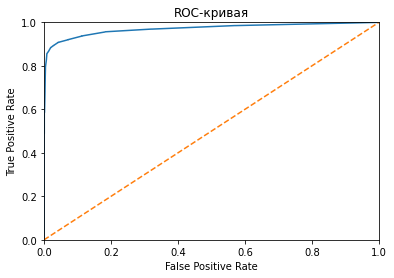

AUC-ROC  0.9706824057204153


In [ ]:
probabilities_test = RandomForest_model.predict_proba(features_downsampled)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_downsampled, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_downsampled, probabilities_one_test)
print('AUC-ROC ', auc_roc)